In [1]:
import numpy as np
import pandas as pd
import Funciones_sismos as BN
import matplotlib.pyplot as plt

<img src='./images/Espectro_resp_ASCE.png' width='400px' height='300px'>

In [2]:
Risk_category = 1
Seismic_design_category = 'D'

#Datos para EEUU
Tl = 0 #input (Ver en mapas 22-14 y 22-17)
Fa = 4  #Ver en ASCE tabla 11.4-1, realizar interpolación si es necesario
Ss = 0 #input
limite = 5

#Datos para Ecuador
zona = 5
suelo = 'C'
fip = 1
fie = 1
fa = 1.21
fd = 1.1
fs = 1.1
n = 2.48
z = 0.43     #Para un TR475 años
Imp = 1.2   #Importancia
rr = 1
R = 6
Ss = n*z*(1)

El valor del T es: 2.0s
El valor del S1 es: 0.8516270400000001g
El valor del Sa(T) es: 0.42581352000000006g
El valor del Coef_V es: 8.516270400000002%
To: 0.5500000000000002
Tc: 0.10000000000000002
Tl: 2.64


,0,1
0,0.000000,0.258069
1,0.010000,0.258069
2,0.020000,0.258069
3,0.030000,0.258069
4,0.040000,0.258069
5,0.050000,0.258069
6,0.060000,0.258069
7,0.070000,0.258069
8,0.080000,0.258069
9,0.090000,0.258069


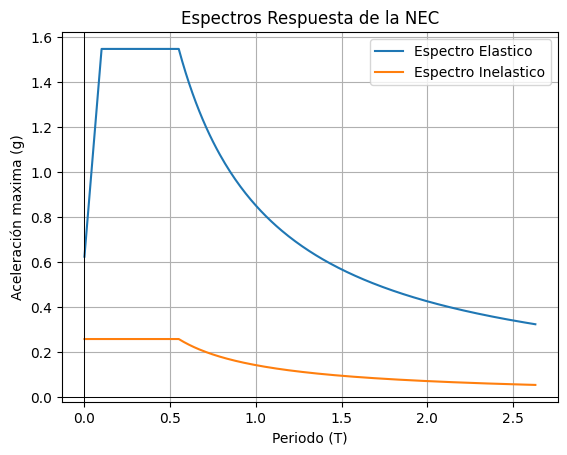

In [3]:
Spec, SpecI, Tmp, Tc, To, Tl = BN.Spec_NEC(n, z, fa, fd, fs, rr, Imp, R, fip, fie, 1)

Wtot = 40000 #T
alfa = 0.75
htot = 120.2
Cs = 0.055
T_ = round(Cs*(htot**alfa), 2)

S1 = None
Sa_T = None
for fila in Spec:
    if fila[0] == 1:
        S1 = fila[1]

    if fila[0] == T_:
        Sa_T = fila[1]


V = (Imp*Wtot*Sa_T)/(R*fip*fie)
Coef_V = (V/Wtot)*100

print(f'El valor del T es: {T_}s')
print(f'El valor del S1 es: {S1}g')
print(f'El valor del Sa(T) es: {Sa_T}g')
print(f'El valor del Coef_V es: {Coef_V}%')
print(f'To: {To}')
print(f'Tc: {Tc}')
print(f'Tl: {Tl}')

fig, ax = plt.subplots()
plt.plot(Spec[:,0], Spec[:,1], label='Espectro Elastico')
plt.plot(SpecI[:,0], SpecI[:,1], label='Espectro Inelastico')
ax.axhline(0, color='black', linewidth=0.7)
ax.axvline(0, color='black', linewidth=0.7)
plt.title('Espectros Respuesta de la NEC')
plt.xlabel('Periodo (T)')
plt.ylabel('Aceleración maxima (g)')
plt.legend()
plt.grid(True)
plt.show

tbl_SpecI_NEC = pd.DataFrame(SpecI)
display(tbl_SpecI_NEC.style.set_caption('Sa_NEC_Espectro Inelástico'))

tbl_Spec_NEC = pd.DataFrame(Spec)
#display(tbl_Spec_NEC.style.set_caption('Sa_NEC_Espectro Elástico'))

<img src='./images/tabla_11-4-2.png' width='420px' height='350px'>

<function matplotlib.pyplot.show(close=None, block=None)>

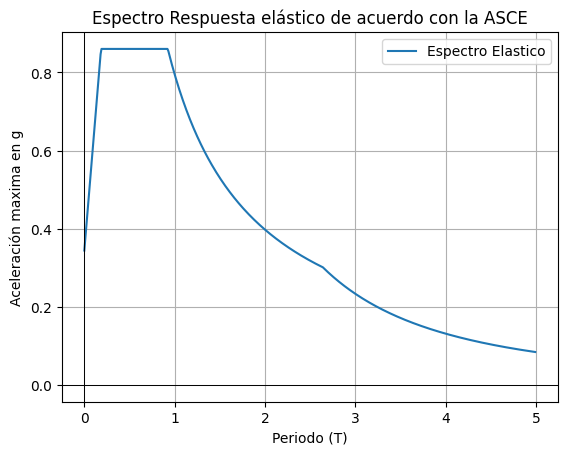

In [4]:
Fv = 1.4  #Ver en ASCE tabla 11.4-2, realizar interpolación si es necesario
Tl = 2.4*fd #Para Ecuador

Spec_ASCE, Tmp = BN.Spec_ASCE7(Tl, fa, Fv, Ss, S1, limite)

fig, ax = plt.subplots()
plt.plot(Spec_ASCE[:,0], Spec_ASCE[:,1], label='Espectro Elastico')
ax.axhline(0, color='black', linewidth=0.7)
ax.axvline(0, color='black', linewidth=0.7)
plt.title('Espectro Respuesta elástico de acuerdo con la ASCE')
plt.xlabel('Periodo (T)')
plt.ylabel('Aceleración maxima en g')
plt.legend()
plt.grid(True)
plt.show

In [5]:
tbl_Spec_ASCE = pd.DataFrame(Spec_ASCE)
display(tbl_Spec_ASCE.style.set_caption('Sa_ASCE_Espectro Elástico'))

,0,1
0,0.000000,0.344092
1,0.010000,0.372021
2,0.020000,0.399951
3,0.030000,0.427880
4,0.040000,0.455810
5,0.050000,0.483739
6,0.060000,0.511669
7,0.070000,0.539598
8,0.080000,0.567528
9,0.090000,0.595457
